# readme
descrip: plot temp and salt contours overlapped with sfc vel quiver in Gulf of Maine and Gulf of Mexico for historic time period <br>

update history: <br>
v1.0 DL 2021Feb06 <br>
v1.1 DL 2021Mar03 <br>
v1.2 DL 2021Apr24 <br>
v1.3 DL 2021May06 make publication-ready pics <br>
v1.4 DL 2021May20 combine TR run results into one fig (for main text) and control run results into one fig (support info) <br>
v1.5 DL 2021Jun02 pivot to CESM-HR special volume paper, use TR minus CN to account for the model drift <br>
 
extra notes: <br>
Fig 3 of the CESM-HR specital volume paper <br>

# import modules

In [1]:
# general python packages
import numpy as np
# from scipy import stats
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
# import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.3.229:38387")
client

Client Scheduler: tcp://10.73.3.229:38387 Dashboard: http://10.73.3.229:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# define parameters

In [3]:
# lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, nlat and nlon ranges are slightly larger than lat and lon ranges. 
# lon1, lon2 = -100, -45
# lat1, lat2 = 10, 60

nlon1_t12, nlon2_t12 = 50, 800
nlat1_t12, nlat2_t12 = 1200, 2100

nlon1_g16, nlon2_g16 = 260, 321
nlat1_g16, nlat2_g16 = 200, 370

chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

# === Gulf of Maine (GMa) ===
lat1_GMa, lat2_GMa = 35, 55
lon1_GMa, lon2_GMa = -75, -50 # GMa: Gulf of Maine
# ===========================

# === Gulf of Mexico (GMe) ===
lat1_GMe, lat2_GMe = 15, 32
lon1_GMe, lon2_GMe = -100, -75 # GMe: Gulf of Mexico
# ============================

# === POP grids files ===
infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
# =======================

outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'TScontourSfcVelHistGulfMaine_2021Jun18.png'
pic2 = outdir + 'TScontourSfcVelHistGulfMexico_2021Jun18.png'

# read data files

read vel files

In [4]:
#TH: transient HR
infile1_vel_TH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.sfcUVVEL_2001-2020av_2021May19.nc')

infile2_vel_TH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.sfcUVVEL_2081-2100av_2021May19.nc')

#CH: control HR
# infile1_vel_CH = ('/scratch/user/dapengli/Projects4iHESP/'
#     'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
#     'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0sfcUVVEL_401-420av_2021May19.nc')

# infile2_vel_CH = ('/scratch/user/dapengli/Projects4iHESP/'
#     'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
#     'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0sfcUVVEL_481-500av_2021May19.nc')

# infile0_TH = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/'
#               'ocn/monthly/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')

ds_vel1_TH=xr.open_dataset(infile1_vel_TH, chunks=chunks_HR)
ds_vel2_TH=xr.open_dataset(infile2_vel_TH, chunks=chunks_HR)
# ds_vel1_CH=xr.open_dataset(infile1_vel_CH, chunks=chunks_HR)
# ds_vel2_CH=xr.open_dataset(infile2_vel_CH, chunks=chunks_HR)
# ds0_TH = xr.open_dataset(infile0_TH, chunks=chunk_size_HR)
ds_vel1_TH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600)
Coordinates:
    z_t      float32 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    UVEL     (nlat, nlon) float32 dask.array<chunksize=(400, 300), meta=np.ndarray>
    VVEL     (nlat, nlon) float32 dask.array<chunksize=(400, 300), meta=np.ndarray>

In [5]:
mons = np.arange(1,13)

indir1a_TH = ('/ihesp/archive/'
          'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/ocn/monthly/')
prefix1a_TH = 'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.'

yrs1a_TH = np.arange(2001,2005+1) 
# B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1928-06.nc
infiles1a_TH = [indir1a_TH + prefix1a_TH + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1a_TH, mons)]
infiles1a_TH

indir2_TH = ('/ihesp/archive/'
          'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF/ocn/monthly/')
prefix2_TH = 'cmpr_B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.'
yrs1b_TH = np.arange(2006,2020+1) 
yrs2_TH = np.arange(2081,2100+1)
# cmpr_B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.2053-02.nc
infiles1b_TH = [indir2_TH + prefix2_TH + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1b_TH, mons)]
infiles2_TH = [indir2_TH + prefix2_TH + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs2_TH, mons)]

infiles1_TH = infiles1a_TH + infiles1b_TH

In [6]:
ds00_TH=xr.open_dataset(infiles1_TH[0])

keeplist=['TEMP','SALT','PD','time','z_t','TLONG','TLAT']

droplist_TH=list(ds00_TH.variables)
for i in keeplist:
    droplist_TH.remove(i)
# droplist

# ds0_TH = xr.open_mfdataset(infiles0_TH, compat="override", combine="by_coords", 
#                        data_vars="minimal", coords="minimal", chunks=chunks_HR, 
#                        drop_variables=droplist_TH, parallel=True)
# time0_s_TH = ds0_TH.time.to_pandas().index.shift(-1,'M')
# ds0_TH = ds0_TH.assign_coords(time=time0_s_TH)

ds1_TH = xr.open_mfdataset(infiles1_TH, compat="override", combine="by_coords", 
                       data_vars="minimal", coords="minimal", chunks=chunks_HR, 
                       drop_variables=droplist_TH, parallel=True)
# time1_s_TH = ds1_TH.time.to_pandas().index.shift(-1,'M')
# ds1_TH = ds1_TH.assign_coords(time=time1_s_TH)

ds1_NA_TH = ds1_TH.isel(nlon=slice(nlon1_t12, nlon2_t12),nlat=slice(nlat1_t12, nlat2_t12))
ds1_TH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 240, z_t: 62)
Coordinates:
  * time     (time) object 2001-02-01 00:00:00 ... 2021-01-01 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
    SALT     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
    PD       (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-03-16 at 08:33:13.4
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  34411091
    tavg_sum:      2678400.0

In [7]:
# TL: transient LR
infile1_vel_TL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.sfcUVVEL_2001-2020av_2021May19.nc')

infile2_vel_TL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.sfcUVVEL_2081-2100av_2021May19.nc')

# CL: control LR
# infile1_vel_CL = ('/scratch/user/dapengli/Projects4iHESP/'
#     'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
#     'cmpr_B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.0sfcUVVEL_401-420av_2021May19.nc')

# infile2_vel_CL = ('/scratch/user/dapengli/Projects4iHESP/'
#     'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
#     'cmpr_B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.0sfcUVVEL_481-500av_2021May19.nc')

# infile0_TL = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/'
#         'ocn/monthly/cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')


ds_vel1_TL=xr.open_dataset(infile1_vel_TL, chunks=chunks_LR)
ds_vel2_TL=xr.open_dataset(infile2_vel_TL, chunks=chunks_LR)
# ds_vel1_CL=xr.open_dataset(infile1_vel_CL, chunks=chunks_LR)
# ds_vel2_CL=xr.open_dataset(infile2_vel_CL, chunks=chunks_LR)
# ds0_TL = xr.open_dataset(infile0_TL,chunks=chunk_size_LR)
ds_vel1_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320)
Coordinates:
    z_t      float32 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    UVEL     (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    VVEL     (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>

In [8]:
indir1a_TL = ('/ihesp/archive/'
          'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/')
prefix1a_TL = 'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.'

yrs1a_TL = np.arange(2001,2005+1) 
# cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1899-04.nc
infiles1a_TL = [indir1a_TL + prefix1a_TL + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1a_TL, mons)]
infiles1a_TL

indir2_TL = ('/ihesp/archive/'
          'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF/ocn/monthly/')
prefix2_TL = 'cmpr_B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.'
yrs1b_TL = np.arange(2006,2013+1) # no 2014 yr due to missing 2014-01 nc file

# cmpr_B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.2055-12.nc
infiles1b_TL = [indir2_TL + prefix2_TL + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1b_TL, mons)]

yrs1c_TL = np.arange(2015,2020+1) 
infiles1c_TL = [indir2_TL + prefix2_TL + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1c_TL, mons)]

infiles1_TL = infiles1a_TL + infiles1b_TL + infiles1c_TL

yrs2_TL = np.arange(2081,2100+1)
infiles2_TL = [indir2_TL + prefix2_TL + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs2_TL, mons)]

In [9]:
ds00_TL=xr.open_dataset(infiles1_TL[0])

keeplist=['TEMP','SALT','time','z_t','TLONG','TLAT']
    
droplist_TL=list(ds00_TL.variables)
for i in keeplist:
    droplist_TL.remove(i)
# droplist

# ds0_TL = xr.open_mfdataset(infiles0_TL, compat="override", combine="by_coords", 
#                        data_vars="minimal", coords="minimal", chunks=chunks_LR, 
#                        drop_variables=droplist_TL, parallel=True)
# time0_s_TL = ds0_TL.time.to_pandas().index.shift(-1,'M')
# ds0_TL = ds0_TL.assign_coords(time=time0_s_TL)

ds1_TL = xr.open_mfdataset(infiles1_TL, compat="override", combine="by_coords", 
                       data_vars="minimal", coords="minimal", chunks=chunks_LR, 
                       drop_variables=droplist_TL, parallel=True)
# time1_s_TL = ds1_TL.time.to_pandas().index.shift(-1,'M')
# ds1_TL = ds1_TL.assign_coords(time=time1_s_TL)

ds1_NA_TL = ds1_TL.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16))
ds1_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 228, z_t: 60)
Coordinates:
  * time     (time) object 2001-02-01 00:00:00 ... 2021-01-01 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
    SALT     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-29 at 09:51:46.0
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  1378625
    tavg_sum:      2678400.0

In [10]:
ds_t12 = xr.open_dataset(infile_t12)
# ds_t12
ds_g16 = xr.open_dataset(infile_g16)
# ds_g16

ds_NA_t12 = ds_t12.isel(nlon=slice(nlon1_t12, nlon2_t12),nlat=slice(nlat1_t12, nlat2_t12))
ds_NA_g16 = ds_g16.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16))

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 720, lon: 1440, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 726.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    t_an                (time, depth, lat, lon) float32 ...
    t_mn                (time, depth, lat, lon) float32 ...
    t_dd                (time, depth, lat, lon) float64 ...
    t_sd                (time, depth, lat, lon) float32 ...
    t_se                (time, depth, lat, lon) float32 ...
    t_oa                (time, depth, lat, lon) float32 ...
    t_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

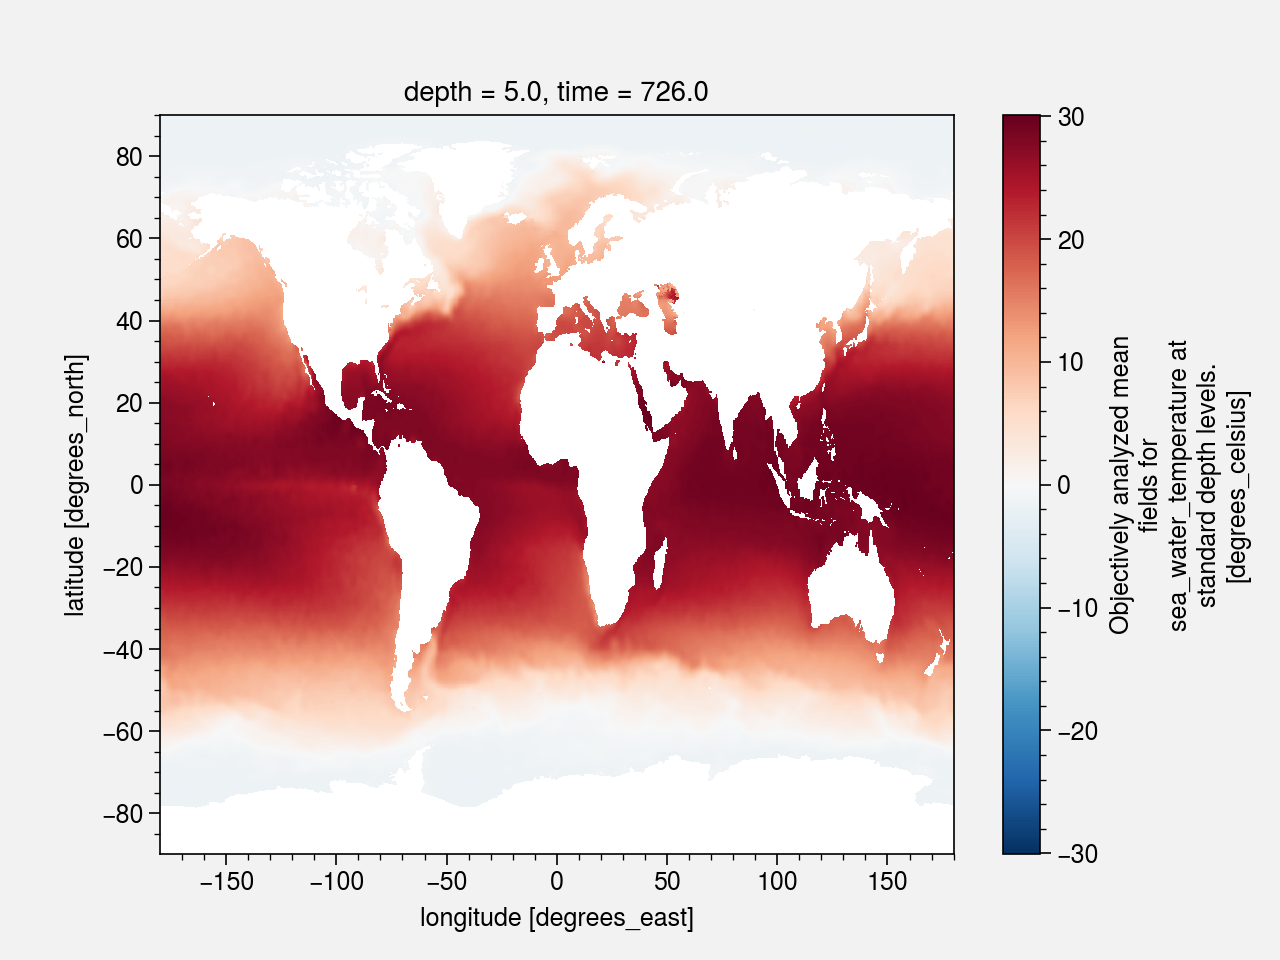

In [11]:
infile_Tobs = '/ihesp/user/dapengli/obs_dat/WOA_2021Jun18/WOA2018/woa18_A5B7_t00_04.nc'
ds_Tobs = xr.open_dataset(infile_Tobs, decode_times=False)
ds_Tobs.t_an.isel(time=0).sel(depth=5).plot()
ds_Tobs

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 720, lon: 1440, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 726.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_an                (time, depth, lat, lon) float32 ...
    s_mn                (time, depth, lat, lon) float32 ...
    s_dd                (time, depth, lat, lon) float64 ...
    s_sd                (time, depth, lat, lon) float32 ...
    s_se                (time, depth, lat, lon) float32 ...
    s_oa                (time, depth, lat, lon) float32 ...
    s_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

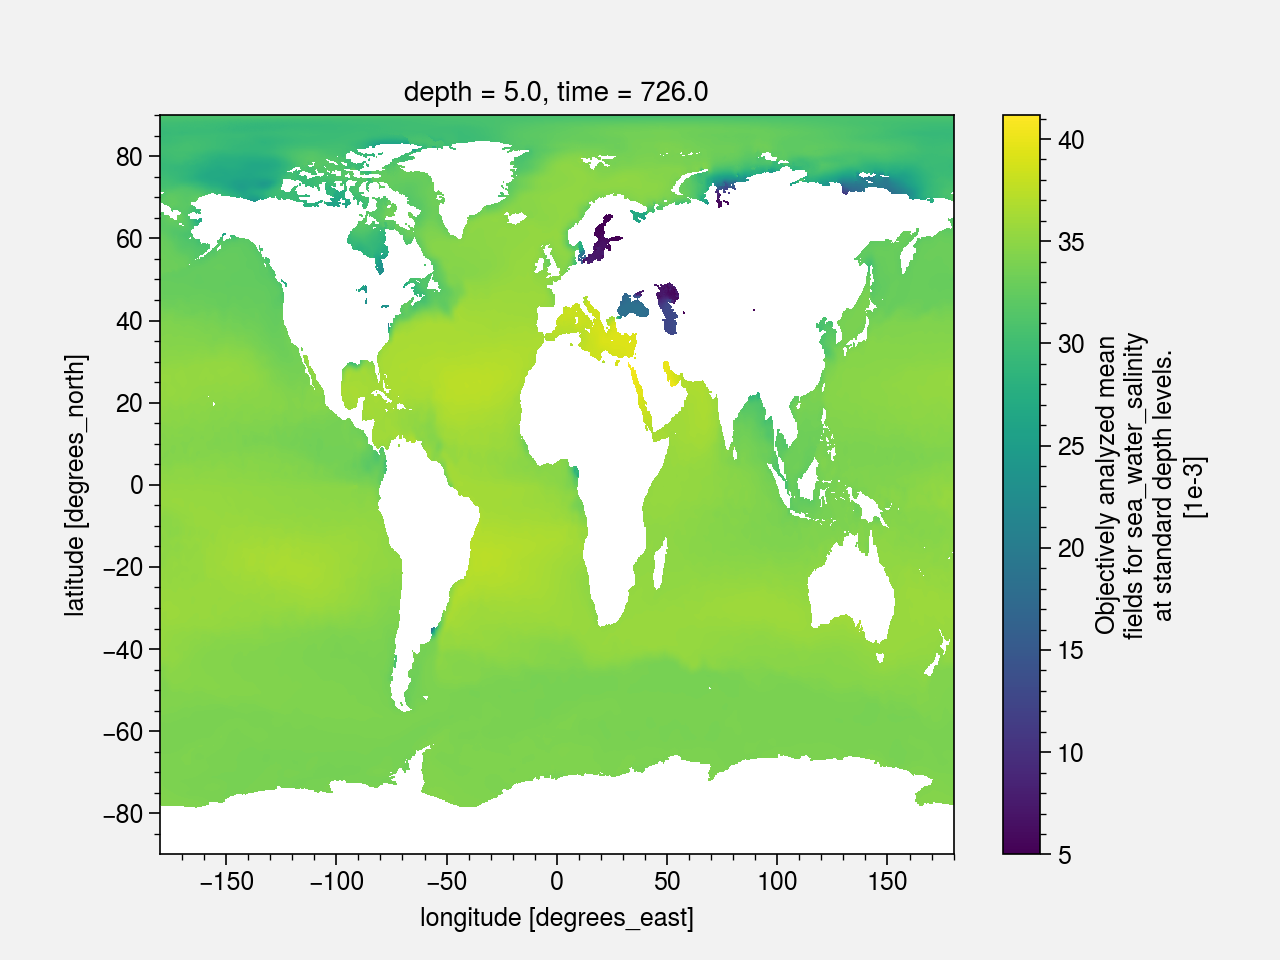

In [12]:
infile_Sobs = '/ihesp/user/dapengli/obs_dat/WOA_2021Jun18/WOA2018/woa18_A5B7_s00_04.nc'
ds_Sobs = xr.open_dataset(infile_Sobs, decode_times=False)
ds_Sobs.s_an.isel(time=0).sel(depth=5).plot()
ds_Sobs

# data analysis 

In [13]:
u1_NA_TH = ds_vel1_TH.UVEL.isel(nlon=slice(nlon1_t12, nlon2_t12), nlat=slice(nlat1_t12, nlat2_t12)).compute() 
v1_NA_TH = ds_vel1_TH.VVEL.isel(nlon=slice(nlon1_t12, nlon2_t12), nlat=slice(nlat1_t12, nlat2_t12)).compute() 
u2_NA_TH = ds_vel2_TH.UVEL.isel(nlon=slice(nlon1_t12, nlon2_t12), nlat=slice(nlat1_t12, nlat2_t12)).compute() 
v2_NA_TH = ds_vel2_TH.VVEL.isel(nlon=slice(nlon1_t12, nlon2_t12), nlat=slice(nlat1_t12, nlat2_t12)).compute() 

u1_NA_TL = ds_vel1_TL.UVEL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute() 
v1_NA_TL = ds_vel1_TL.VVEL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute() 
u2_NA_TL = ds_vel2_TL.UVEL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute() 
v2_NA_TL = ds_vel2_TL.VVEL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute() 

In [14]:
# du_THmCH = (ds_vel2_TH.UVEL-ds_vel2_CH.UVEL) - (ds_vel1_TH.UVEL - ds_vel1_CH.UVEL) 
# dv_THmCH = (ds_vel2_TH.VVEL-ds_vel2_CH.VVEL) - (ds_vel1_TH.VVEL - ds_vel1_CH.VVEL) 
# du_NA_THmCH = du_THmCH.isel(nlon=slice(nlon1_t12, nlon2_t12), nlat=slice(nlat1_t12, nlat2_t12)).compute()
# dv_NA_THmCH = dv_THmCH.isel(nlon=slice(nlon1_t12, nlon2_t12), nlat=slice(nlat1_t12, nlat2_t12)).compute()

# du_TLmCL = (ds_vel2_TL.UVEL-ds_vel2_CL.UVEL) - (ds_vel1_TL.UVEL - ds_vel1_CL.UVEL) 
# dv_TLmCL = (ds_vel2_TL.VVEL-ds_vel2_CL.VVEL) - (ds_vel1_TL.VVEL - ds_vel1_CL.VVEL) 
# du_NA_TLmCL = du_TLmCL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute()
# dv_NA_TLmCL = dv_TLmCL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute()

In [15]:
# Ma: Gulf of maine, mask GS for Gulf of Maine circulation plot
u1Ma_NA_TL = u1_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),np.nan)
v1Ma_NA_TL = v1_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),np.nan)
u1Ma_NA_TH = u1_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),np.nan)
v1Ma_NA_TH = v1_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),np.nan)

# u2Ma_NA_TL = u2_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),np.nan)
# v2Ma_NA_TL = v2_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),np.nan)
# u2Ma_NA_TH = u2_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),np.nan)
# v2Ma_NA_TH = v2_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),np.nan)

# duMa_NA_THmCH = du_NA_THmCH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),np.nan)
# dvMa_NA_THmCH = dv_NA_THmCH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),np.nan)

# make pics

Gulf of Maine

In [16]:
%%time
temp1_NA_TL = ds1_NA_TL.TEMP.isel(z_t=0).mean('time').compute()
salt1_NA_TL = ds1_NA_TL.SALT.isel(z_t=0).mean('time').compute()

temp1_NA_TH = ds1_NA_TH.TEMP.isel(z_t=0).mean('time').compute()
salt1_NA_TH = ds1_NA_TH.SALT.isel(z_t=0).mean('time').compute()

CPU times: user 8.6 s, sys: 92.3 ms, total: 8.7 s
Wall time: 1min 57s


/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


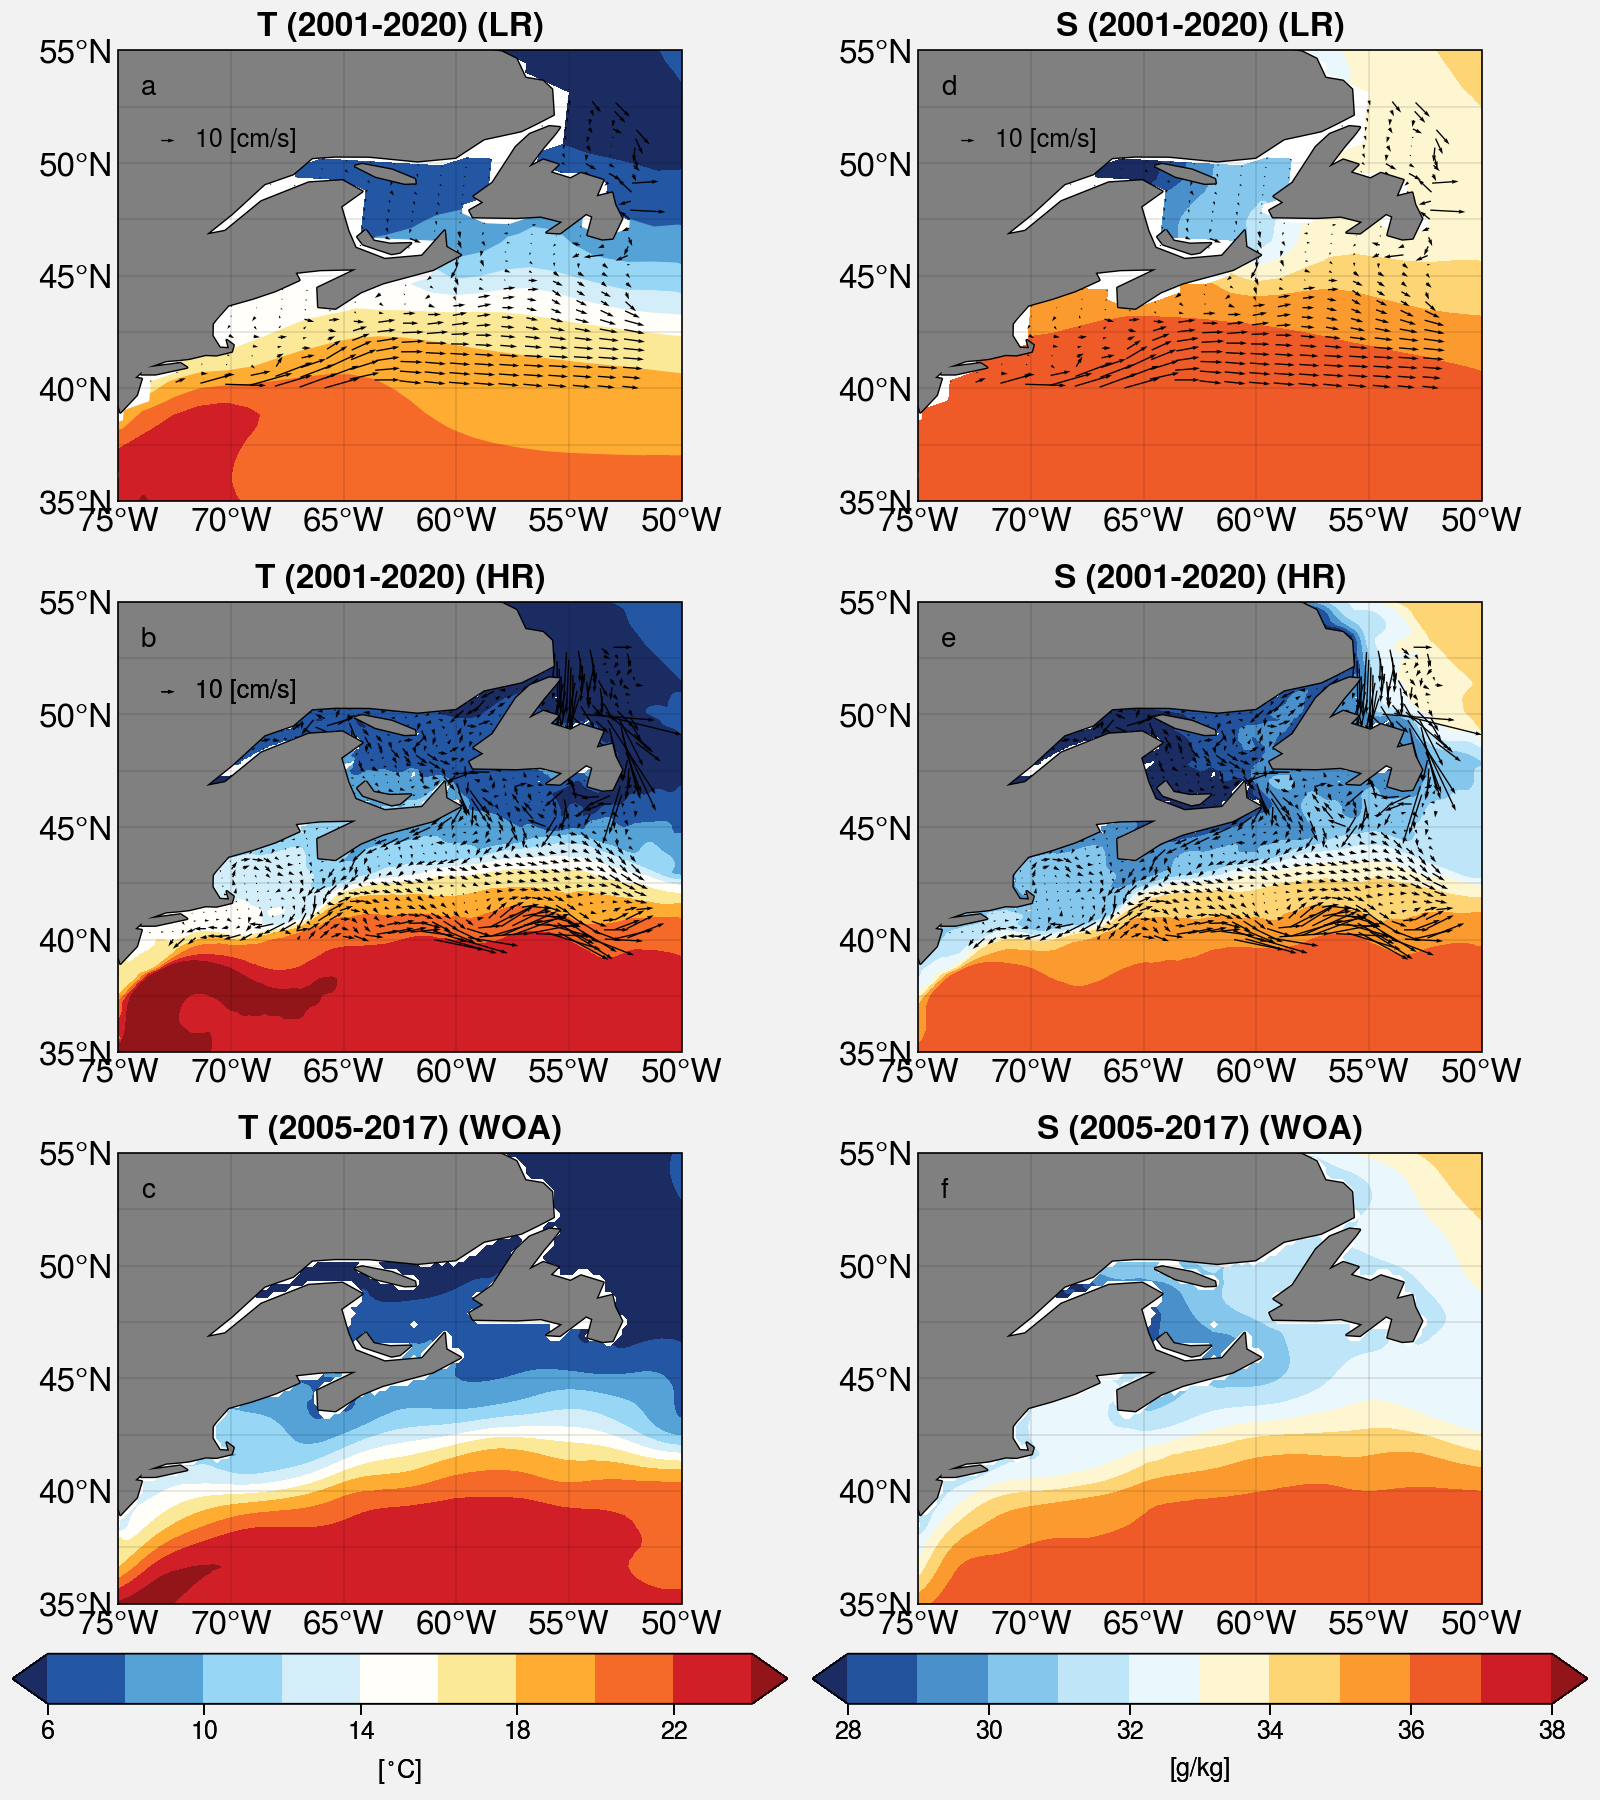

In [17]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='9in')

m00=axs[0,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        temp1_NA_TL,  levels=np.arange(6,24+1,2), transform=pc, 
         cmap="ColdHot", extend='both')
q00 = axs[0,0].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, u1Ma_NA_TL, v1Ma_NA_TL, 
                      transform=pc, scale=150, scale_units='inches')
axs[0,0].quiverkey(q00, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('T (2001-2020) (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-74, 53, 'a', transform=pc, fontsize=10)
# cb = axs[0,0].colorbar(m00,loc='r',label='[C]',width='2em',shrink=1)

m01=axs[0,1].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        salt1_NA_TL, levels=np.arange(28,38+1,1), transform=pc, 
        cmap="ColdHot", extend='both')
q01 = axs[0,1].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      u1Ma_NA_TL, v1Ma_NA_TL, transform=pc, 
                      scale=150, scale_units='inches')
axs[0,1].quiverkey(q01, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('S (2001-2020) (LR)', fontsize=12, fontweight='bold')
axs[0,1].text(-74, 53, 'd', transform=pc, fontsize=10)


m10=axs[1,0].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        temp1_NA_TH,  levels=np.arange(6,24+1,2), transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
q10 = axs[1,0].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                u1Ma_NA_TH[::5,::5], v1Ma_NA_TH[::5, ::5], transform=pc, scale=150,scale_units='inches')
axs[1,0].quiverkey(q10, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('T (2001-2020) (HR)', fontsize=12, fontweight='bold')
axs[1,0].text(-74, 53, 'b', transform=pc, fontsize=10)
# cb = axs[1,0].colorbar(m10,loc='b',label='[C]',width='2em',shrink=1)

m11=axs[1,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        salt1_NA_TH, levels=np.arange(28,38+1,1),  transform=pc, 
         cmap="ColdHot", extend='both')
q11 = axs[1,1].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                u1Ma_NA_TH[::5,::5], v1Ma_NA_TH[::5, ::5], transform=pc, scale=150,scale_units='inches')
axs[1,1].quiverkey(q10, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('S (2001-2020) (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-74, 53, 'e', transform=pc, fontsize=10)

m20=axs[2,0].contourf(ds_Tobs.lon, ds_Tobs.lat, 
        ds_Tobs.t_an.isel(time=0).sel(depth=5), levels=np.arange(6,24+1,2),  transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('T (2005-2017) (WOA)', fontsize=12, fontweight='bold')
axs[2,0].text(-74, 53, 'c', transform=pc, fontsize=10)
cb = axs[2,0].colorbar(m20,loc='b',label='[$^\circ$C]',width='2em',shrink=1)

m21=axs[2,1].contourf(ds_Tobs.lon, ds_Tobs.lat, 
        ds_Sobs.s_an.isel(time=0).sel(depth=5), levels=np.arange(28,38+1,1),  transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title('S (2005-2017) (WOA)', fontsize=12, fontweight='bold')
axs[2,1].text(-74, 53, 'f', transform=pc, fontsize=10)
cb = axs[2,1].colorbar(m21,loc='b',label='[g/kg]',width='2em',shrink=1)

fig1.savefig(pic1, bbox_inches='tight')

Gulf of Mexico

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


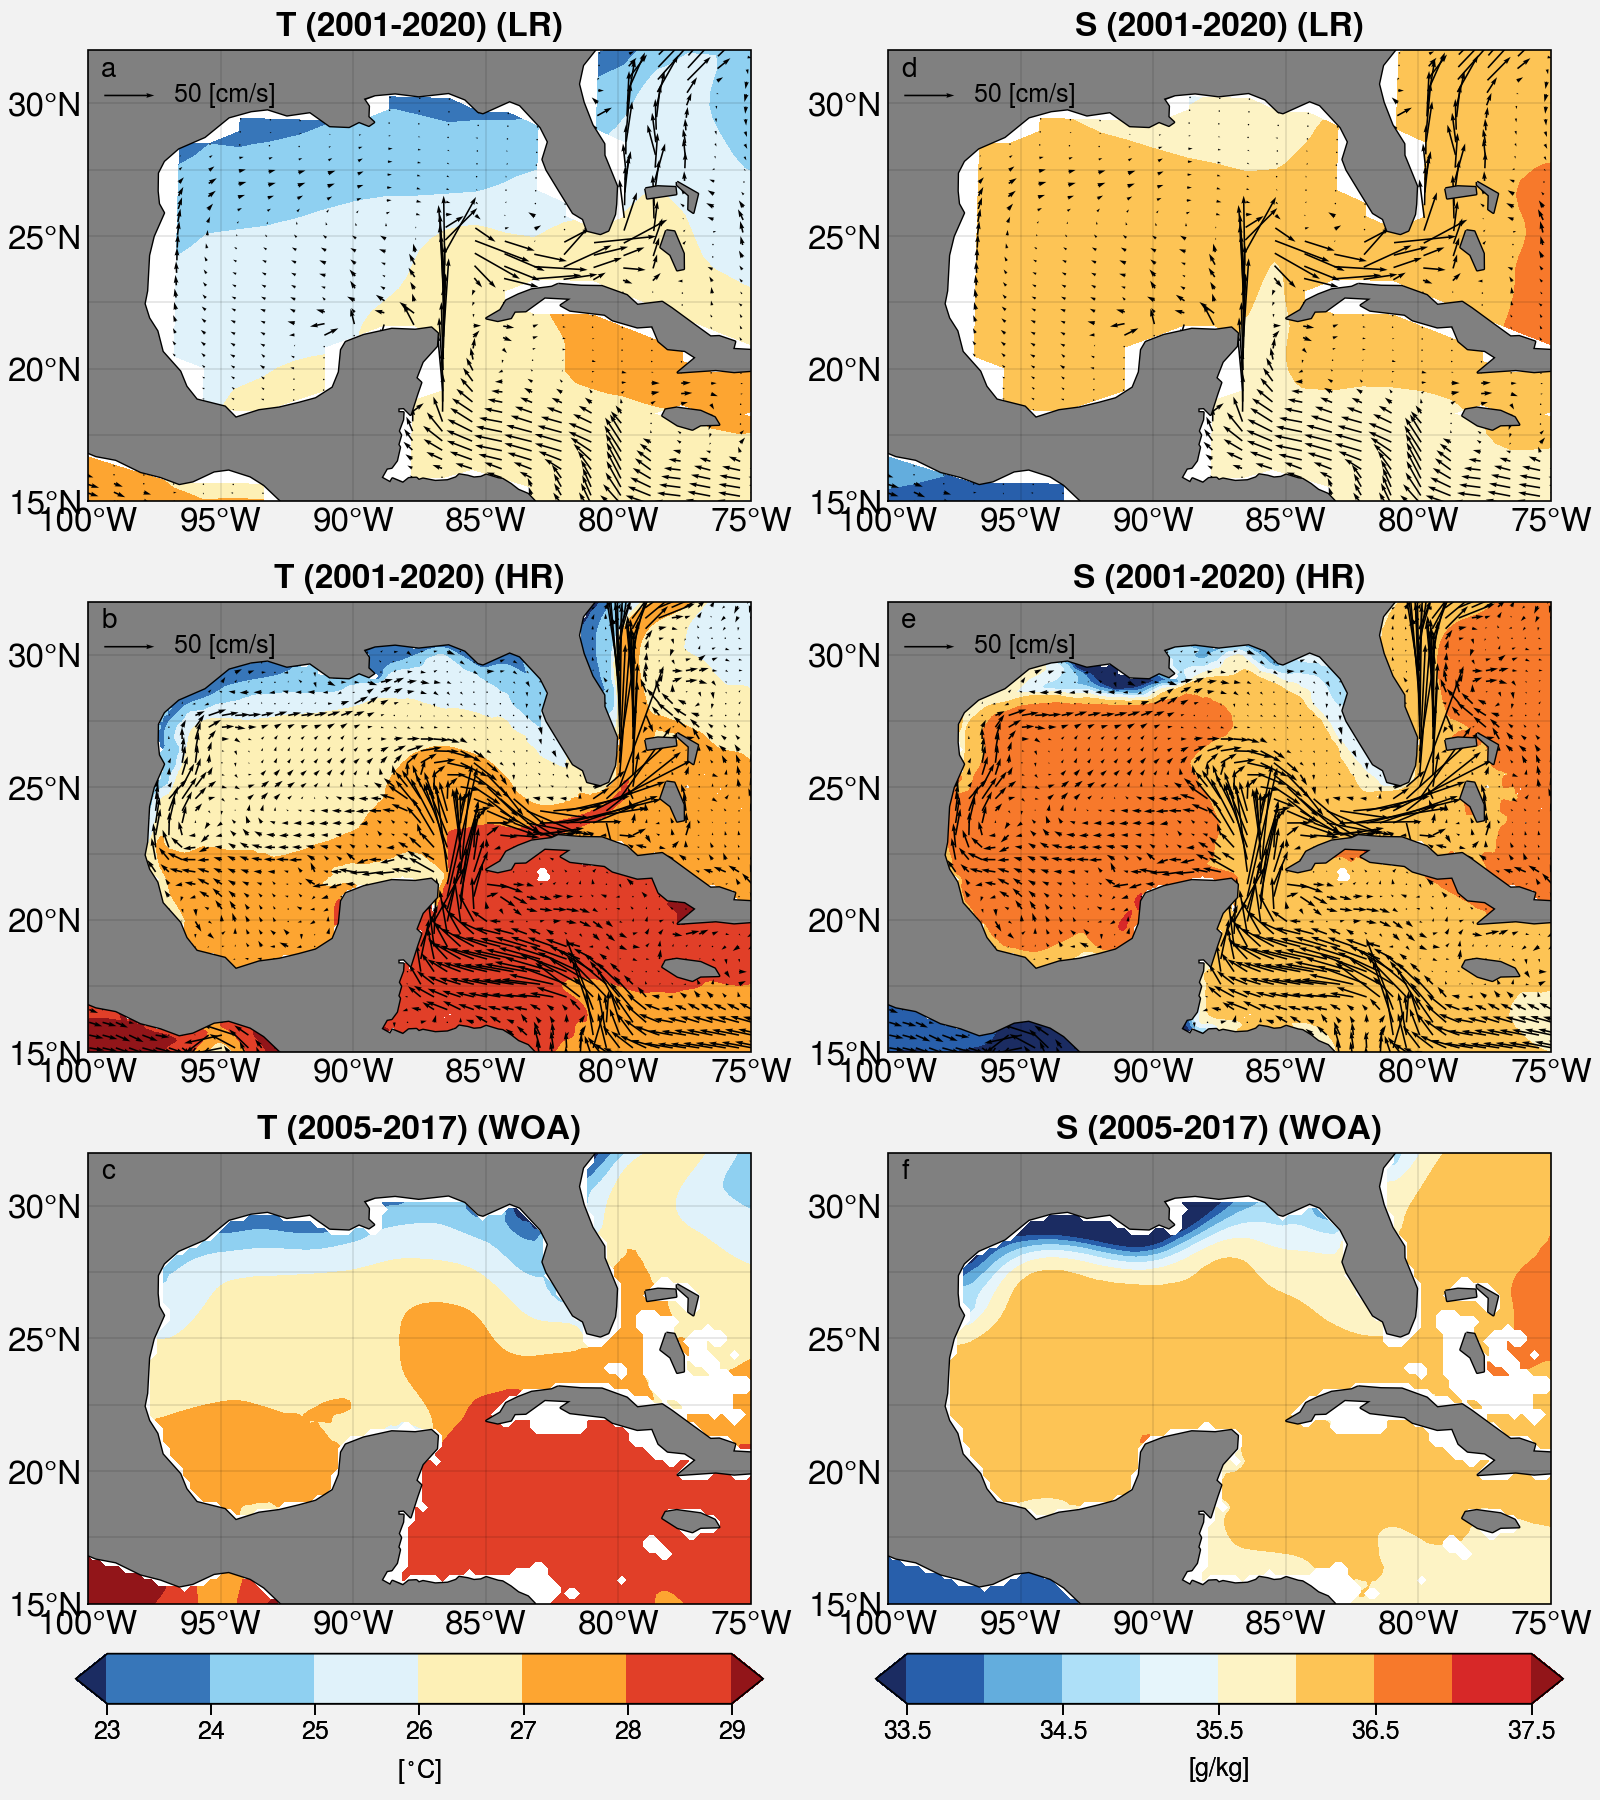

In [18]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig2, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='9in')

m00=axs[0,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        temp1_NA_TL,  levels=np.arange(23,29+1,1), transform=pc, 
        cmap="ColdHot", extend='both')
q00 = axs[0,0].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      u1_NA_TL, v1_NA_TL, 
                      transform=pc, scale=200, scale_units='inches')
axs[0,0].quiverkey(q00, X=0.1, Y=0.9, U=50,
             label='50 [cm/s]', labelpos='E')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('T (2001-2020) (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-99.5, 31, 'a', transform=pc, fontsize=10)

m01=axs[0,1].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        salt1_NA_TL,  levels=np.arange(33.5,37.51,0.5), transform=pc, 
        cmap="ColdHot", extend='both')
q01 = axs[0,1].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      u1_NA_TL, v1_NA_TL, 
                      transform=pc, scale=200, scale_units='inches')
axs[0,1].quiverkey(q01, X=0.1, Y=0.9, U=50,
             label='50 [cm/s]', labelpos='E')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('S (2001-2020) (LR)', fontsize=12, fontweight='bold')
axs[0,1].text(-99.5, 31, 'd', transform=pc, fontsize=10)


m10=axs[1,0].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        temp1_NA_TH,  levels=np.arange(23,29+1,1), transform=pc, 
        cmap="ColdHot", extend='both')
q10 = axs[1,0].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                      u1_NA_TH[::5,::5], v1_NA_TH[::5,::5], 
                      transform=pc, scale=200, scale_units='inches')
axs[1,0].quiverkey(q10, X=0.1, Y=0.9, U=50, label='50 [cm/s]', labelpos='E')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('T (2001-2020) (HR)', fontsize=12, fontweight='bold')
axs[1,0].text(-99.5, 31, 'b', transform=pc, fontsize=10)

m11=axs[1,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
         salt1_NA_TH,  levels=np.arange(33.5,37.51,0.5), transform=pc, 
         cmap="ColdHot", extend='both')
q11 = axs[1,1].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                      u1_NA_TH[::5,::5], v1_NA_TH[::5,::5], 
                      transform=pc, scale=200, scale_units='inches')
axs[1,1].quiverkey(q11, X=0.1, Y=0.9, U=50,
             label='50 [cm/s]', labelpos='E')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('S (2001-2020) (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-99.5, 31, 'e', transform=pc, fontsize=10)


m20=axs[2,0].contourf(ds_Tobs.lon, ds_Tobs.lat, 
        ds_Tobs.t_an.isel(time=0).sel(depth=5), levels=np.arange(23,29+1,1),  transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('T (2005-2017) (WOA)', fontsize=12, fontweight='bold')
axs[2,0].text(-99.5, 31, 'c', transform=pc, fontsize=10)
cb = axs[2,0].colorbar(m20,loc='b',label='[$^\circ$C]',width='2em',shrink=1)

m21=axs[2,1].contourf(ds_Sobs.lon, ds_Sobs.lat, 
        ds_Sobs.s_an.isel(time=0).sel(depth=5), levels=np.arange(33.5,37.51,0.5),  transform=pc, 
         cmap="ColdHot", extend='both') # vmin=0, vmax=40,
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title('S (2005-2017) (WOA)', fontsize=12, fontweight='bold')
axs[2,1].text(-99.5, 31, 'f', transform=pc, fontsize=10)
cb = axs[2,1].colorbar(m21,loc='b',label='[g/kg]',width='2em',shrink=1)


fig2.savefig(pic2, bbox_inches='tight')